# **PROBLEM STATEMENT**

Detecting sarcasm in news headlines and articles is crucial for several reasons. Sarcasm occurs when someone says something but means the opposite, often with a humorous or critical tone. This can easily confuse readers, especially when vocal cues and body language are absent in written text. If sarcasm is not recognized, it can lead to misunderstandings and the spread of false
information.

# **SOLUTION DESCRIPTION**

We developed a CNN-LSTM model to accurately detect sarcasm in news headlines. This model uses a combination of convolutional and recurrent neural networks to capture patterns and sequences in the text.

# **DATASET DESCRIPTION**

The News Headlines dataset for Sarcasm Detection is collected from two sources: TheOnion (sarcastic) and HuffPost (non-sarcastic).

Dataset Statistics: Total Records: 26,709 Columns: Headline, Is_Sarcastic, Article_Link

Examples of Text: " drunk driver in the zone“ (Sarcastic) " lots of parents know this scenario “ (Non-sarcastic) " after decades of effort, chemists overseas report 'nano' breakthrough “ (Non-Sarcastic)

# **DATA VISUALIZATION**

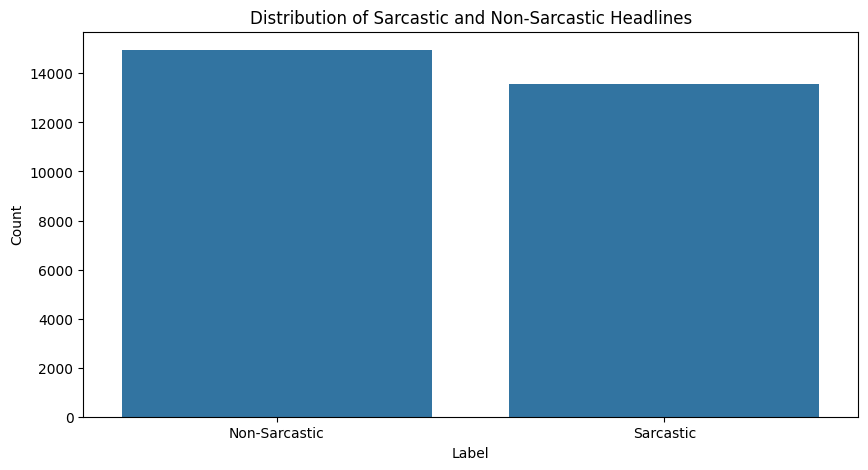

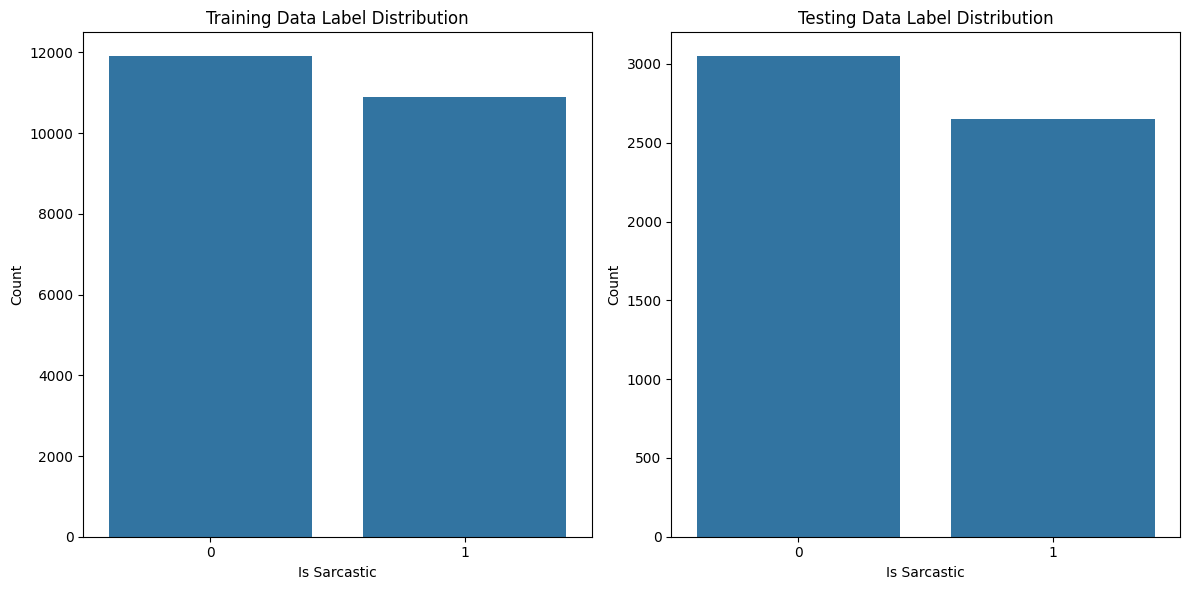

# MODEL ARCHITECTURE

**Embedding Layer:**

Purpose: Converts words into dense vectors of fixed size, capturing semantic information.

Parameters:
vocab_size: Size of the vocabulary.
embedding_dim: Dimension of the dense embedding (set to 200).
input_length: Maximum length of the input sequences.

**1D Convolutional Layer:**

Purpose: Extracts local patterns from the sequence data.

Parameters:
filters: Number of output filters in the convolution (set to 128).
kernel_size: Size of the convolution window (set to 5).
activation: Activation function (set to 'relu').

**Max Pooling Layer:**

Purpose: Reduces the dimensionality of the feature map, keeping the most salient features.

Parameters:
pool_size: Size of the pooling window (set to 4).

**Bidirectional LSTM Layer:**

Purpose: Processes sequences from both directions, capturing contextual information from past and future states.

Parameters:
units: Number of LSTM units (set to 100).

**Dense Layer:**

Purpose: Fully connected layer for output classification.

Parameters:
units: Number of neurons (set to 1).
activation: Activation function for binary classification (set to 'sigmoid').

# **CLASSIFICATION REPORT AND CONFUSION MATRIX**

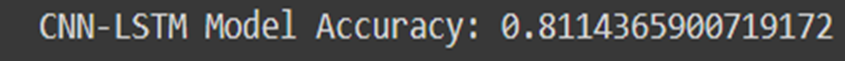



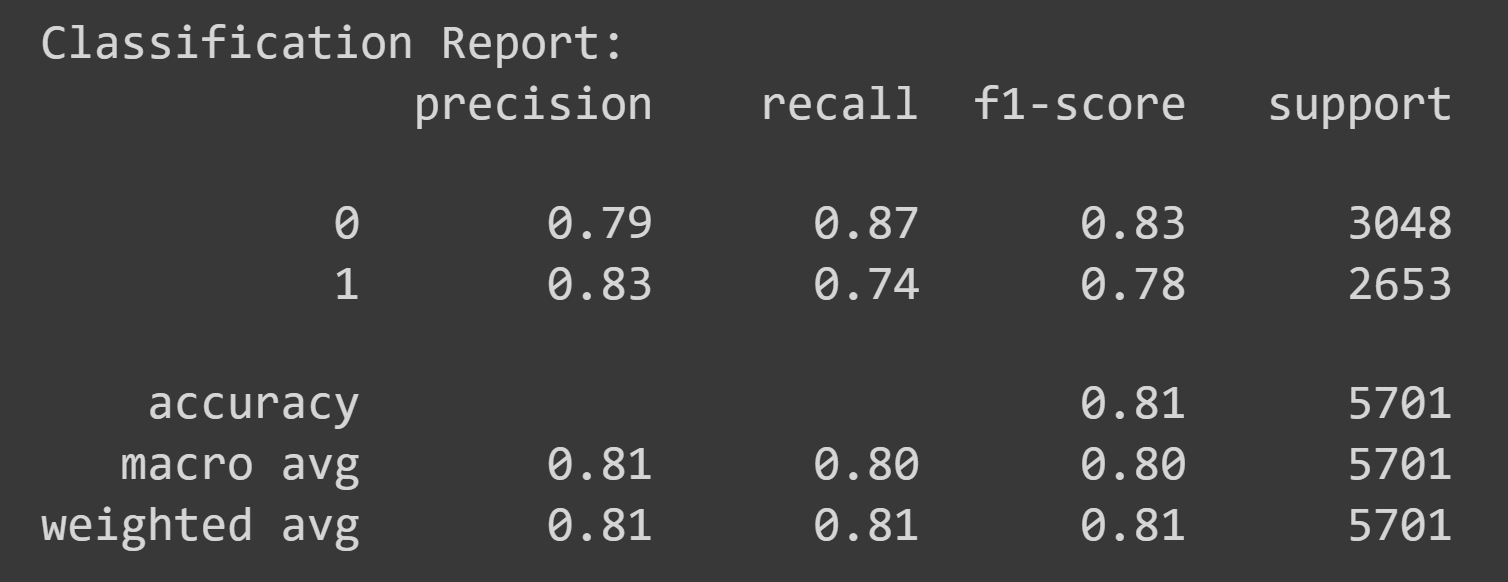

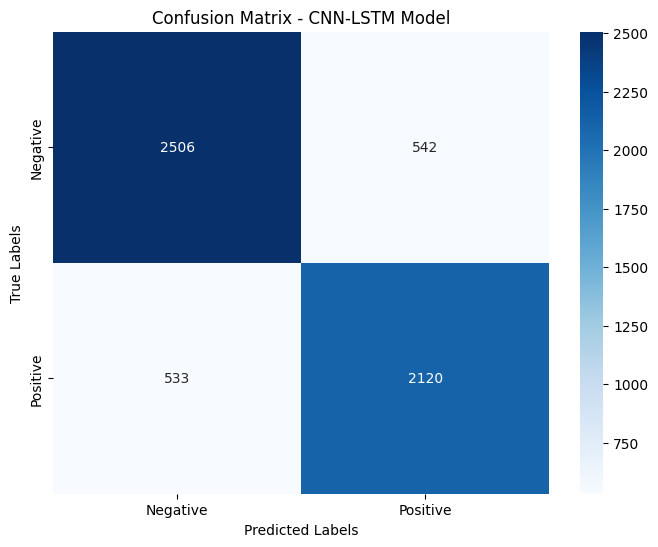

# **LOADING THE MODEL AND CREATING A PREDICTION FUNCTION**

In [3]:
import re
import string
import pickle
from nltk.corpus import stopwords
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Download NLTK stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# Function to preprocess, tokenize, and pad a new sentence, and make predictions
def preprocess_and_predict(sentence, max_length):
    # Load the saved model and tokenizer
    model = load_model('cnn_lstm_model.h5')
    with open('tokenizer.pkl', 'rb') as f:
        tokenizer = pickle.load(f)

    def preprocess_text(text):
        stop = set(stopwords.words('english'))
        punctuation = list(string.punctuation)
        stop.update(punctuation)

        def split_into_words(text):
            return text.split()

        def to_lower_case(words):
            return [word.lower() for word in words]

        def remove_punctuation(words):
            re_punc = re.compile('[%s]' % re.escape(string.punctuation))
            return [re_punc.sub('', w) for w in words]

        def keep_alphabetic(words):
            return [word for word in words if word.isalpha()]

        def remove_stopwords(words):
            return [w for w in words if not w in stop]

        def to_sentence(words):
            return ' '.join(words)

        words = split_into_words(text)
        words = to_lower_case(words)
        words = remove_punctuation(words)
        words = keep_alphabetic(words)
        words = remove_stopwords(words)
        return to_sentence(words)

    # Preprocess the input sentence
    processed_sentence = preprocess_text(sentence)

    # Tokenize and pad the input sentence
    sequence = tokenizer.texts_to_sequences([processed_sentence])
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post')

    # Make prediction
    prediction = model.predict(padded_sequence)
    return "Sarcastic" if prediction > 0.5 else "Not Sarcastic"

# Define the maximum length used during training
max_length = 106  # Set this to the max_length used during training

# **EXAMPLE HEADLINES**

In [19]:
new_sentence = "Weather Forecast Predicts Clear Skies for the Weekend"
result = preprocess_and_predict(new_sentence, max_length)
print(f'The sentence "{new_sentence}" is {result}.')

1/1 [==============================] - 1s 853ms/step
The sentence "Weather Forecast Predicts Clear Skies for the Weekend" is Not Sarcastic.


In [20]:
# Example usage
new_sentence = "Social Media Influencer Discovers New Cure for Boredom: Real-Life Interaction"
result = preprocess_and_predict(new_sentence, max_length)
print(f'The sentence "{new_sentence}" is {result}.')

1/1 [==============================] - 1s 555ms/step
The sentence "Social Media Influencer Discovers New Cure for Boredom: Real-Life Interaction" is Sarcastic.


In [21]:
  # Example usage
new_sentence = "Politician Calls for Unity, Immediately Divides Public Opinion"
result = preprocess_and_predict(new_sentence, max_length)
print(f'The sentence "{new_sentence}" is {result}.')

1/1 [==============================] - 1s 561ms/step
The sentence "Politician Calls for Unity, Immediately Divides Public Opinion" is Sarcastic.


In [22]:
# Example usage
new_sentence = "Internet Activism Raises Awareness for Global Issues"
result = preprocess_and_predict(new_sentence, max_length)
print(f'The sentence "{new_sentence}" is {result}.')

1/1 [==============================] - 1s 562ms/step
The sentence "Internet Activism Raises Awareness for Global Issues" is Not Sarcastic.


In [23]:
# Example usage
new_sentence = "Hotel Guests Rave About Scenic View of Parking Lot and Noisy Construction"
result = preprocess_and_predict(new_sentence, max_length)
print(f'The sentence "{new_sentence}" is {result}.')

1/1 [==============================] - 1s 1s/step
The sentence "Hotel Guests Rave About Scenic View of Parking Lot and Noisy Construction" is Sarcastic.


# **CONCLUSION**

The model is working and giving the correct predictions.